In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [6]:
from app_store_scraper import AppStore
import json

In [7]:
def ios_reviews(app_name):
    app = AppStore(country='us', app_name=app_name)
    app.review()
    return app

In [8]:
df_nurx = pd.DataFrame(np.array(ios_reviews('Nurx').reviews),columns=['review'])
df_nurx = df_nurx.join(pd.DataFrame(df_nurx.pop('review').tolist()))
df_nurx.head()

2021-12-08 18:57:22,162 [INFO] Base - Searching for app id
2021-12-08 18:57:24,650 [INFO] Base - Initialised: AppStore('us', 'nurx', 1213141301)
2021-12-08 18:57:24,650 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/nurx/id1213141301
2021-12-08 18:57:29,902 [INFO] Base - [id:1213141301] Fetched 280 reviews (280 fetched in total)
2021-12-08 18:57:35,313 [INFO] Base - [id:1213141301] Fetched 560 reviews (560 fetched in total)
2021-12-08 18:57:40,719 [INFO] Base - [id:1213141301] Fetched 840 reviews (840 fetched in total)
2021-12-08 18:57:46,440 [INFO] Base - [id:1213141301] Fetched 1140 reviews (1140 fetched in total)
2021-12-08 18:57:52,030 [INFO] Base - [id:1213141301] Fetched 1440 reviews (1440 fetched in total)
2021-12-08 18:57:56,096 [INFO] Base - [id:1213141301] Fetched 1649 reviews (1649 fetched in total)


,date,userName,isEdited,review,developerResponse,rating,title
0,2021-07-23 20:51:56,asatkins,True,I previously rated this app 5 stars but have c...,"{'id': 15761213, 'body': 'Hi there, thank you ...",3,Customer service has drastically decreased
1,2021-07-15 00:23:10,kristenamaya,True,I've seriously never written a review for an a...,"{'id': 18105323, 'body': 'Hi Kristena, thank y...",5,Absolutely amazing. Highly recommend to everyo...
2,2021-07-20 19:30:18,gbondy1,False,I’ve used Nurx for several years - first for b...,"{'id': 24106695, 'body': 'Hi, thank you for yo...",5,Incredible for migraines!
3,2019-08-30 06:58:18,Hykrye,False,"Okay so I’ve like, never reviewed an app, but ...",NaN,5,I don’t usually review but
4,2020-09-10 17:26:50,beccaem2472,False,I had been going back and forth getting my pre...,NaN,5,Helpful app and AMAZING service


In [9]:
df_nurx.shape

(1649, 7)

In [26]:
df = df_nurx[df_nurx['rating']<3]

In [12]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [13]:
import nltk
stemmer = nltk.PorterStemmer()

In [14]:
from nltk.corpus import stopwords
from collections import Counter
import re

stop_words = set(stopwords.words('English'))

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, lower_case=True, remove_punctuation=True, remove_numbers=True, lemmatizing=True, remove_stopwords=True, stemming=True):
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.remove_numbers = remove_numbers
        self.lemmatizing = lemmatizing
        self.remove_stopwords = remove_stopwords
        self.stemming = stemming
        
    def fit(self,X ,y=None):
        return self
    
    def transform(self, X, y=None):
        X_processed = []
        for text in X:
            if self.lower_case:
                text = text.lower()
            if self.remove_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', ' ', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            if self.remove_stopwords:
                text = [word for word in text.split() if not word in stop_words]
            """if self.lemmatizing:
                lem_words = []
                for word in text:
                    word_lemma = lemmatizer.lemmatize(word)
                    lem_words.append(word_lemma)
                text = lem_words
                """
            if self.stemming:
                stemmed_words=[]
                for word in text:
                    word_stem = stemmer.stem(word)
                    stemmed_words.append(word_stem)
                text = stemmed_words
            bigram_words = []
            for i in range(len(text)-1):
                bigram_words.append(text[i]+" "+text[i+1])
            word_counts = Counter(bigram_words)
            #word_counts = Counter(text)
            """if self.lemmatizing:
                #lem_counter = Counter()
                lem=[]
                for word in text:
                    word_lemma = lemmatizer.lemmatize(word)
                    lem.append(word_lemma)"""
            
            X_processed.append(word_counts)
        return np.array(X_processed)

In [27]:
text_processor = TextProcessor()
data = text_processor.fit_transform(df['review'])
data

array([Counter({'birth control': 4, 'select gener': 2, 'correct rx': 2, 'receiv respons': 2, 'move forward': 2, 'typic write': 1, 'write review': 1, 'review howev': 1, 'howev would': 1, 'would like': 1, 'like share': 1, 'share experi': 1, 'experi ensur': 1, 'ensur happen': 1, 'happen anyon': 1, 'anyon els': 1, 'els like': 1, 'like peopl': 1, 'peopl heard': 1, 'heard servic': 1, 'servic uber': 1, 'uber birth': 1, 'control thought': 1, 'thought idea': 1, 'idea birth': 1, 'control deliv': 1, 'deliv right': 1, 'right home': 1, 'home sound': 1, 'sound great': 1, 'great upon': 1, 'upon regist': 1, 'regist abl': 1, 'abl choos': 1, 'choos birth': 1, 'control take': 1, 'take save': 1, 'save trip': 1, 'trip physician': 1, 'physician pay': 1, 'pay copay': 1, 'copay rx': 1, 'rx refil': 1, 'refil select': 1, 'gener use': 1, 'use previous': 1, 'previous work': 1, 'work well': 1, 'well bodi': 1, 'bodi select': 1, 'gener name': 1, 'name think': 1, 'think would': 1, 'would get': 1, 'get gener': 1, 'gen

In [18]:
from rake_nltk import Rake

rake = Rake()

def extract_keyword(data):
    keywords_list=[]
    for text in data:
        rake.extract_keywords_from_text(text)
        keywords = rake.get_ranked_phrases()
        keywords_list.append(keywords)
    return keywords_list

In [16]:
def extract_keyword(data):
    keywords_list=[]
    for text in data:
        rake.extract_keywords_from_text(text)
        keywords = rake.get_ranked_phrases()
        keywords_list.append(keywords)
    return keywords_list

In [14]:
X = df_practo.copy()

In [19]:
X['keywords'] = extract_keyword(X['content'])

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [94]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['title'])

In [95]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=4, n_init=1)

In [96]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [97]:
for i in range(true_k):
    print('Cluster %d:' % i),
    for ind in order_centroids[i, :20]:
         print(' %s' % terms[ind])

Cluster 0:
 don
 app
 use
 terrible
 time
 waste
 awful
 doesn
 disappointed
 work
 good
 money
 response
 recommend
 worth
 worst
 won
 bad
 just
 service
Cluster 1:
 useless
 app
 zero
 finnessed
 fraud
 forever
 fooled
 flaws
 fix
 fine
 finish
 frustrated
 fees
 feels
 feel
 fatphobic
 freezes
 frustrating
 fast
 handle
Cluster 2:
 horrible
 service
 customer
 terrible
 bad
 absolutely
 communication
 poor
 use
 experience
 app
 clueless
 nonexistent
 negligent
 fraud
 avoid
 borderline
 skills
 worst
 simply
Cluster 3:
 scam
 like
 ultimate
 feel
 feels
 use
 horrible
 reviews
 run
 listen
 away
 fraud
 finish
 fix
 fine
 fees
 fatphobic
 faster
 flaws
 fooled


In [103]:
issues = [ 'Payment issues',
          'technical issues',
          'Customer support',
         'Feedback issue',
         ]

In [104]:
df['Issues'] = model.predict(X)

<ipython-input-104-0fae5155c3c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Issues'] = model.predict(X)


In [105]:
df['Issues'].value_counts()

0    483
2     65
3     23
1      4
Name: Issues, dtype: int64

In [36]:
vocabulary_size=1000
total_count = Counter()
for word_count in data:
    for word, count in word_count.items():
        total_count[word] += count#min(count, 10)
most_common = total_count.most_common()[:vocabulary_size]
vocabulary = {word: count for index, (word, count) in enumerate(most_common)}

In [37]:
vocabulary

{'birth control': 311,
 'custom servic': 103,
 'use app': 49,
 'use nurx': 37,
 'wast time': 35,
 'credit card': 34,
 'even though': 33,
 'tri get': 30,
 'get birth': 30,
 'everi time': 27,
 'cancel order': 27,
 'get prescript': 27,
 'seem like': 25,
 'consult fee': 24,
 'local pharmaci': 23,
 'would recommend': 23,
 'go doctor': 23,
 'two week': 22,
 'get back': 22,
 'take day': 21,
 'get respons': 20,
 'insur cover': 20,
 'pill club': 20,
 'side effect': 19,
 'cancel subscript': 19,
 'feel like': 18,
 'answer question': 18,
 'week ago': 18,
 'insur compani': 18,
 'day later': 17,
 'charg card': 17,
 'insur card': 17,
 'day ago': 16,
 'money back': 16,
 'pay pocket': 16,
 'messag app': 15,
 'health insur': 15,
 'plan parenthood': 15,
 'take forev': 15,
 'tri app': 14,
 'messag say': 14,
 'get bc': 14,
 'go back': 14,
 'control pill': 14,
 'first month': 14,
 'respond messag': 14,
 'said would': 14,
 'use servic': 14,
 'call insur': 14,
 'three month': 14,
 'place order': 13,
 'take lo

Most common mentioned phrases and terms 

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextProcessor2(BaseEstimator, TransformerMixin):
    def __init__(self, lower_case=True, remove_punctuation=True, remove_numbers=True, lemmatizing=True, remove_stopwords=True, stemming=True):
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.remove_numbers = remove_numbers
        self.lemmatizing = lemmatizing
        self.remove_stopwords = remove_stopwords
        self.stemming = stemming
        
    def fit(self,X ,y=None):
        return self
    
    def transform(self, X, y=None):
        X_processed = []
        for text in X:
            if self.lower_case:
                text = text.lower()
            if self.remove_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', ' ', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            if self.remove_stopwords:
                text = [word for word in text.split() if not word in stop_words]
            word_counts = Counter(text)
            if self.lemmatizing:
                lem_words = Counter()
                for word,count in word_counts.items():
                    word_lemma = lemmatizer.lemmatize(word)
                    lem_words[word_lemma]+=count
                
            """f self.stemming:
                stemmed_words=[]
                for word in text:
                    word_stem = stemmer.stem(word)
                    stemmed_words.append(word_stem)
                text = stemmed_words
            bigram_words = []
            for i in range(len(text)-1):
                bigram_words.append(text[i]+" "+text[i+1])
            word_counts = Counter(bigram_words)
            #word_counts = Counter(text)
            """
            """if self.lemmatizing:
                #lem_counter = Counter()
                lem=[]
                for word in text:
                    word_lemma = lemmatizer.lemmatize(word)
                    lem.append(word_lemma)"""
            
            X_processed.append(word_counts)
        return np.array(X_processed)

In [39]:
text_processor2 = TextProcessor2()
word_counts = text_processor2.fit_transform(df['review'])

In [40]:
vocabulary2 = Counter()
for item in word_counts:
    for word,count in item.items():
        vocabulary2[word]+=count

In [41]:
vocabulary2.most_common()

[('app', 421),
 ('get', 388),
 ('insurance', 340),
 ('birth', 311),
 ('control', 309),
 ('nurx', 276),
 ('would', 260),
 ('prescription', 247),
 ('service', 238),
 ('time', 232),
 ('days', 192),
 ('even', 191),
 ('one', 162),
 ('back', 156),
 ('order', 144),
 ('never', 143),
 ('doctor', 139),
 ('sent', 126),
 ('customer', 124),
 ('charged', 124),
 ('month', 123),
 ('like', 122),
 ('told', 122),
 ('go', 120),
 ('pharmacy', 119),
 ('response', 115),
 ('first', 114),
 ('still', 114),
 ('tried', 109),
 ('message', 109),
 ('pill', 108),
 ('money', 107),
 ('got', 106),
 ('company', 106),
 ('use', 106),
 ('said', 105),
 ('card', 102),
 ('going', 98),
 ('pills', 97),
 ('take', 95),
 ('months', 90),
 ('medication', 90),
 ('messages', 89),
 ('without', 86),
 ('pay', 86),
 ('want', 85),
 ('could', 85),
 ('bc', 84),
 ('try', 84),
 ('week', 83),
 ('cancel', 83),
 ('received', 81),
 ('asked', 81),
 ('also', 80),
 ('new', 79),
 ('used', 78),
 ('need', 78),
 ('know', 78),
 ('trying', 76),
 ('informati

In [45]:
X = df.copy()
X['keyword'] = word_counts

In [46]:
X['keyword']

5       {'typically': 1, 'write': 1, 'reviews': 1, 'ho...
7       {'skeptical': 1, 'trying': 2, 'app': 2, 'know'...
8       {'using': 1, 'app': 1, 'four': 2, 'years': 2, ...
11      {'waste': 1, 'money': 1, 'decided': 2, 'use': ...
12      {'first': 1, 'used': 1, 'nurx': 1, 'years': 1,...
                              ...                        
1634    {'decided': 1, 'try': 2, 'app': 5, 'traveling'...
1635    {'used': 1, 'nurx': 5, 'convenience': 2, 'exac...
1636    {'actually': 1, 'want': 1, 'prescription': 4, ...
1641    {'man': 1, 'headache': 1, 'service': 2, 'month...
1643    {'would': 1, 'like': 1, 'start': 1, 'review': ...
Name: keyword, Length: 575, dtype: object

In [47]:
issue_areas = ['birth', 'prescription',  'service', 'time', 'money', 'insurance', 'pharmacy']

In [48]:
issue_counts={}

for issue in issue_areas:
    count = 0
    for x in X['keyword']:
        if issue in x.keys():
            count+=1
    issue_counts[issue]=count

## 
## A deeper analysis into reviews
## 

In [49]:
import nltk.corpus
from nltk.text import Text
from nltk.tokenize import sent_tokenize, word_tokenize
import docx2txt

def get_phrases_containing_word(target_word, passage, left_margin = 10, right_margin = 10):
    tokens = nltk.word_tokenize(passage)
    text = nltk.Text(tokens) 
    ## Collect all the index or offset position of the target word
    c = nltk.ConcordanceIndex(text.tokens, key = lambda s: s.lower())
 
    ## Collect the range of the words that is within the target word by using text.tokens[start;end].
    ## The map function is use so that when the offset position - the target range < 0, it will be default to zero
    concordance_txt = ([text.tokens[list(map(lambda x: x-5 if (x-left_margin)>0 else 0,[offset]))[0]:offset+right_margin]
                        for offset in c.offsets(target_word)])
                         
    ## join the sentences for each of the target phrase and return it
    return [''.join([x+' ' for x in con_sub]) for con_sub in concordance_txt]

In [51]:
def get_phrases(word):
    doc = ' '.join(df['review'])
    results = get_phrases_containing_word(word, doc)
    for result in results:
        print(result)

In [52]:
get_phrases('system')

honestly abandoned by the healthcare system . This app is not helping me . It 
lot goes into the messaging system inside the app and it ’ s that immense 
I tried calling their phone system and after waiting over 20 minutes , someone picked 
and the automated voice messaging system saying that there aren ’ t any available team 
new rx , but their system told me I already had an open order for 
get it together . This system definitely doesn ’ t have its kinks worked out 
card information is in the system , you can ’ t get it out ... 
you to use the messaging system . I don ’ t know what the hell 
my ID again because their system doesn ’ t work . Tried to log back 
calls or Messages the automated system hung up on me twice after a 2 hour 
shortcomings of the traditional healthcare system . Just really crappy customer service . Took three 
get this straight in their system . They told me that my insurance had lied 
. In the app the system shows expired 04/2020 , but when I click to 


In [55]:
get_phrases('payment')

went in and changed my payment method to my insurance and my new debit card 
I want to proceed with payment . You can ’ t even cancel the subscription 
me ? My address & payment information was changed to an old address & card 
few days later saying my payment was refused ... and they were using my OLD 
it . They have my payment information and I can ’ t delete my account 
them . They take your payment information and there is no option to delete it 
due to several miscommunications with payment issues . Basically them charging my card without checking 
i was okay with the payment amount . Then they literally refilled a mystery subscription 
of my purchase , my payment info , etc . Sent an email to support 
not let you delete you payment info either ) . I even tried putting a 
all of my insurance and payment information . They charged my card $ 15 on 
when i get to the payment screen it says inaccurate payment method . Please fix 
payment screen it says inaccurate payment method . Plea

In [56]:
get_phrases('account')

. I am canceling my account because like one other person has said my pill 
not yet technically have an account . So then I tried to press sign up 
that email was already an account ( duh because you had me add it on 
them to tell me my account says I have to contact them for my prescription 
to process something on your account and you 're in need of you prescription , 
them to delete/ deactivate my account and they have yet to respond and it ’ 
does not take it into account . I put the problems with a medication that 
ignored . Thei canceled my account , but I have not received a refund or 
so I created a new account to my updated information . I was then told 
had to use my old account , and kept running into issues of my information 
. One week later my account was charged ... and even though I reached out 
my own eyes that my account showed “ cancelled ” via the app . I 
dollar taken out of my account . I already currently supplied for birth control until 
. I finally cancelled my

In [57]:
get_phrases('receipt')

was to send me a receipt to give to my insurance for them to pay 


In [58]:
get_phrases('interface')

fees charged , and broken interface . Hadn ’ t used this service in 6 


In [60]:
get_phrases('insurance')

request and gave them my insurance info and by the end of the day my 
submitted my request and my insurance info and it processed for two days before I 
was an issue with my insurance . Another day later I get a message saying 
why this happened because my insurance has fully covered the brand name I requested , 
would have to ask my insurance and that the prescription was written to substitute to 
I have overall great health insurance with a pretty big network , and yet My 
refill , even after my insurance . You ’ ll get a nice little message 
to be free with my insurance . the app is also confusing and hard to 
experience . I lost my insurance in March of this year so I started looking 
each month , saying my insurance won ’ t cover it even tho my insurance 
cover it even tho my insurance hasn ’ t changed at all , etc ) 
mine is free through my insurance & it ’ s great being able to receive 
it would be for my insurance . I was assured that they would let me 
even get approval from m

In [86]:
get_phrases('birth')

being the “ Uber of birth controls ” and thought the idea of having my 
the idea of having my birth control delivered right to my home sounded great . 
was able to choose the birth control I ’ ve been taking . This saves 
am in with the incorrect birth control . Avoid this app at all costs if 
my order and pick the birth control I wanted . One thing I should mention 
's supposed to be `` birth control made easy '' but it seems to be 
a current prescribed pack of birth control . I first used Nurx a few years 
so I really need my birth control . It keeps me from bleeding constantly ( 
prior to being put on birth control because of the cyst ) and it helps 
pay for monthly subscriptions of birth control pills . I had to find out the 
automatically given 3 packs of birth control without the option of just buying one ... 
talk to my doctor about birth control because of the just much easier process ... 
causing me to receive my birth control late ( ! ) . there was a 
of my specific kind of b

In [62]:
get_phrases('user')

I was a long time user of Nurx and used to recommend it because it 
. Does no one conduct user testing anymore ? First page asked just for my 


In [64]:
get_phrases('email')

got approved I got a email telling me to go to the app to approve 
. Zero response . The email address for support just links to this message portal 
hadn ’ t gotten an email saying it had been shipped a week before my 
I have to text , email , and message in the “ live chat ” 
page asked just for my email immediately . Then , I was asked to log 
to log in with an email and password but I got an error message , 
prompted me for name , email , and password which I completed only to receive 
error message saying that that email was already an account ( duh because you had 
insurance claims ( I get email notifications from my provider ) and it shows that 
a medical team sent an email saying that I was wrong and with the medications 
just use the app or email to get ahold of them . I want to 
app . I received an email asking why I chose not to use your services 
allows me to enter my email but it ’ s just a cycle of entering 
cycle of entering in an email . This has created so much stress 

In [66]:
get_phrases('chat')

get a response through the chat , and if you call on the phone you 
others have said , the chat feature seems like a good idea , but sometimes 
) . Also , the chat feature is great ... IF you can get someone 
people who enter the “ chat ” on their app . They are extremely negligent 
’ s not a live chat , yea no one thought it was , but 
back from their “ live chat ” in five days . The first time I 
joke . Their “ live chat ” is anything but . They are super unresponsive 
message in the “ live chat ” like a crazy person before I get any 
’ s not a live chat service , regardless it doesn ’ t take you 
nor is there a live chat function . Even though I would respond within one 
back to you through the chat . It will take at-least three days for the 
! ! ! ! Their chat is not 24/7 Therefore causes delay if you need 
them through the in app chat and texted the number they gave me to communicate 
or to answer an actual chat . What ’ s the point of a customer 
. I immediately opened the chat a

In [69]:
get_phrases('bug')

my prescription ran into a bug where my automatic refills were paused and nobody communicated 
This seems to be a bug on both iOS and on the website ( I 
if it ’ s a bug or what , but when I search for my 
got caught in a “ bug ” and were deleted , and I would need 
DONT SEND . This “ bug ” also cancelled my order . It ’ s 


In [70]:
get_phrases('server')

( ? ) by the server . I ’ ve tried multiple times on different 


In [73]:
get_phrases('loading')

’ t get past the loading screen . It shows a loading circle and nurx 
screen . It shows a loading circle and nurx above it . I thought maybe 
It opens and shows the loading symbol but never makes it passed that screen . 
app . It never stops loading so the app never opens . I ’ ve 
open . It just keeps loading and never opens . I used Nurx a while 
Does not move beyond initial loading screen . I rarely write reviews but the customer 


In [74]:
get_phrases('window')

“ within a three hour window ” otherwise it was considered a “ missed dose. 
to spin this ten day window into being a helpful thing , but they use 
was outside the 10 day window where they resolve shipments . I was waiting to 


In [76]:
get_phrases('platform')

of messages on their messaging platform all completely ignored . I tried calling their phone 


In [77]:
get_phrases('notification')

it . I got a notification from my insurance provider that the pharmacy Nurx has 
And just yesterday I got notification that my BC shipped , only to be greeted 
I should receive a shipping notification within 2-3 days . It has now been over 
’ t received a shipping notification yet or any notification telling me if there ’ 
shipping notification yet or any notification telling me if there ’ s an issue . 
. Nothing . Get a notification it shipped . Wrote again I did not want 
I would be sent a notification for shipping in 1-2 business days . It is 
until I just got a notification a few mins ago from my bank saying they 
concerns. ’ I got a notification that my Rx was being shipped and had to 
months and sent a shipping notification for it . I ’ m reaching the end 
ring bc . On every notification I received after set up , it stated I 
2-3 business days for a notification saying my birth control would be processed . I 
, I had gotten a notification asking me to approve of a payment of $ 
.

In [78]:
get_phrases('updates')

. They never communicated the updates to the prescription or what I ’ d be 
” and poorly thought out updates . It would be pretty easy for them to 
they can provide you with updates , thanks. ” While I appreciate them getting back 
fixed so we can make updates as needed and cancel subscriptions if needed . They 
, I have had no updates on shipping info . I contacted the customer service 
, I had never gotten updates on the status of my order and had to 
I had not received any updates on my next order , so I message the 


In [79]:
get_phrases('page')

s a “ Checkout ” page but this doesn ’ t exist . You never 
on their Better Business Bureau page - which I should have checked before I tried 
user testing anymore ? First page asked just for my email immediately . Then , 
reached out to their Facebook page and was told “ Someone will be in touch 
up a password , the page is unable to be read ( ? ) by 
sends me to an error page . Was really hoping that this would work : 
keeps refreshing to the main page . They simply do not know what they are 
t get past the first page . It just freezes . Shame cause it actually 
online portal on your insurance page . In fact , my insurance company ( Aetna 


In [80]:
get_phrases('error')

I continue to get an error message , saying the prescription is under review and 
password but I got an error message , presumably because I did not yet technically 
only to receive yet another error message saying that that email was already an account 
now . They made an error in my most recent refill and I ’ ve 
info they always found an error processing , even tho everything was correct . Honestly 
, it took trial and error to find my right kind of birth control- I 
3 different physicians about an error I made on their survey and to show for 
’ t even correct an error they made . My pills have been in transit 
it sends me to an error page . Was really hoping that this would work 
or anything really it says error processing your request . I even tried to delete 
off and gives me an error message . I had to uninstall . It ’ 


### The following were identified as problems in 3 and lower star ratings

- card information in the system cannot be rmeoved
- updating personal information does not work
-  payment screen says inaccurate payment method on chaging old payment methods
- refilled a subscription without user consent
- administration requires user to contact them for prescription 
- no option to delete/ deactivate account
- administration can delete/charge the user account without the user knowing
- app takes insurance information yet automatically charges the user 
- app makes the user submit all their sensitive info like card details,insurance info before letting them use it
- keeps charging the insurance company 
- birth control for free with insurance details but not provided
- prescription can run into a bug where automatic refills are paused
- no updates on shipping info
- “ Checkout ” page doesn ’ t exist
- error message , saying the prescription is under review
- no reply from customer care
- chat facility is slow
- email not valid error
- bad customer service
- no tracking system for orders

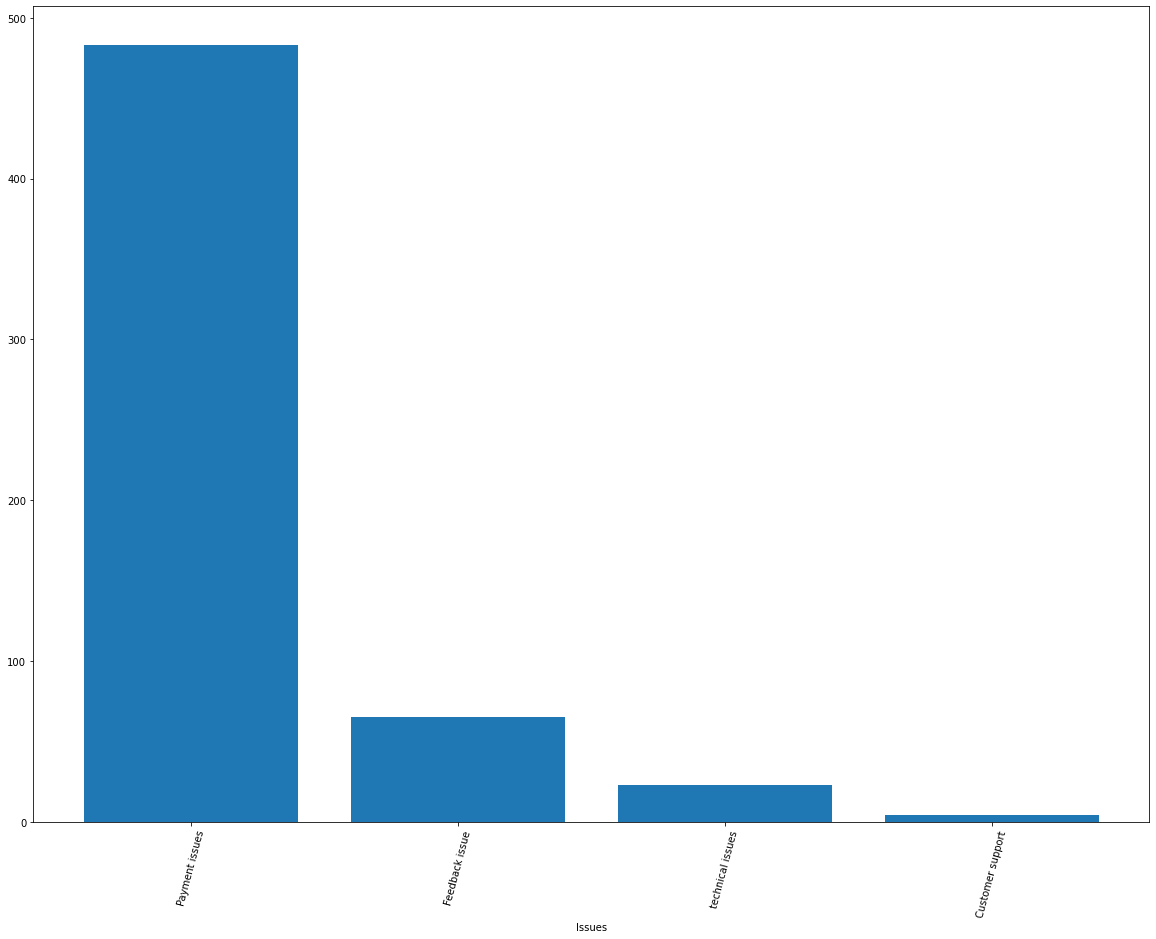

In [106]:
plt.figure(figsize=(20,15))
plt.bar([0,1,2,3], height=df['Issues'].value_counts())
plt.xlabel('Issues')
plt.xticks(ticks=[0,2,3,1], labels=issues, rotation=75)
plt.show()

##### Highest no of issues were observed in terms of payment issues(approx 483), feedback issues, technical issues and lastly customer support
##### 

C:\Users\kulsum kamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


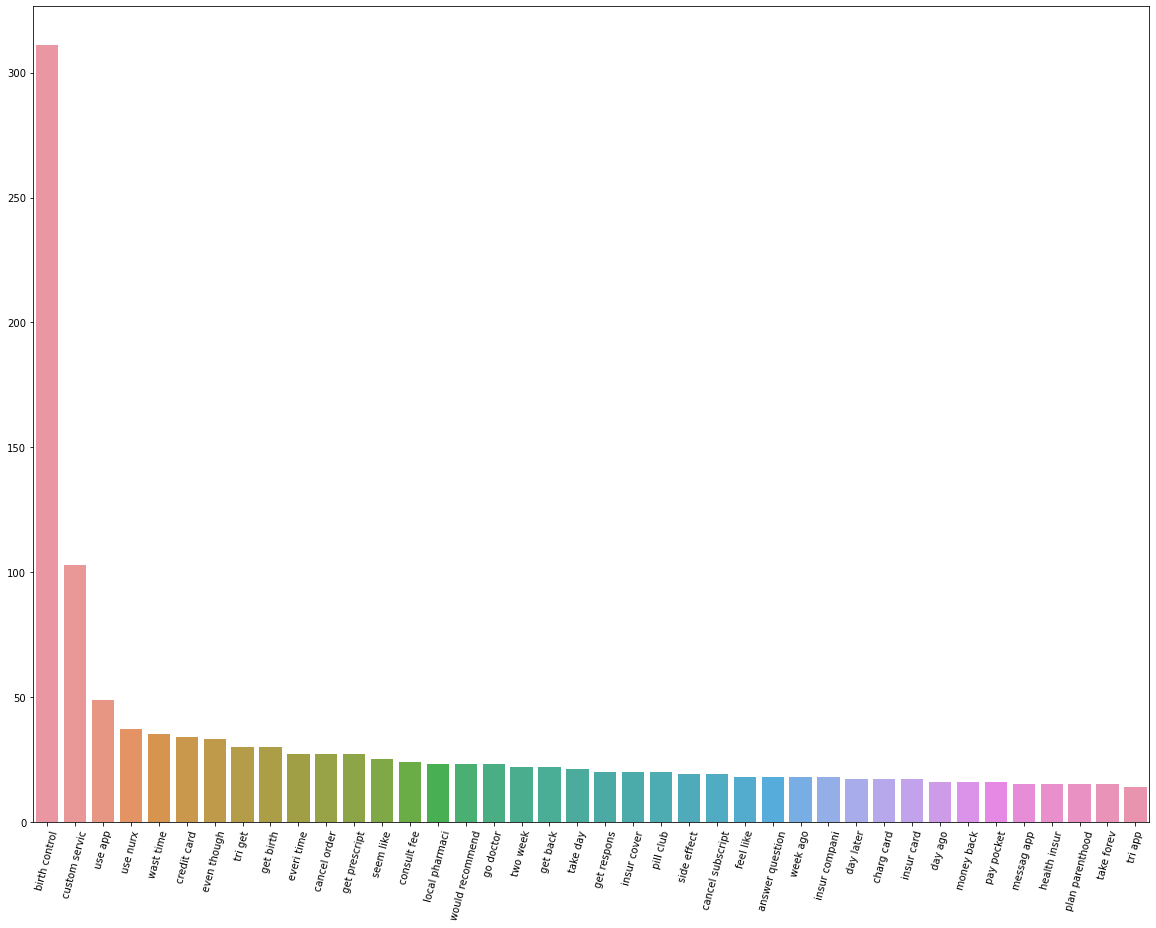

In [82]:
plt.figure(figsize=(20,15))
sns.barplot(list(vocabulary.keys())[:40],list(vocabulary.values())[:40])
plt.xticks(rotation=75)
plt.show()

C:\Users\kulsum kamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


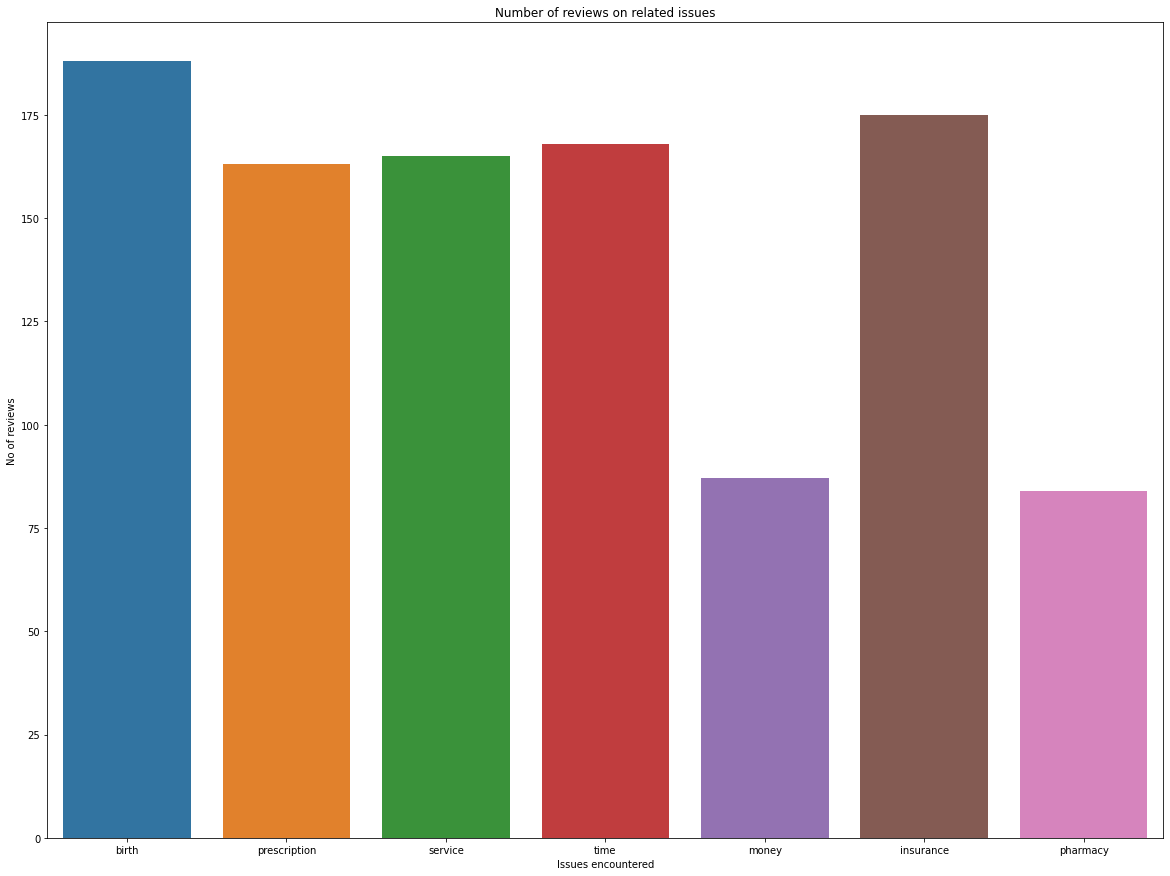

In [83]:
plt.figure(figsize=(20,15))
sns.barplot(list(issue_counts.keys()), list(issue_counts.values()))
plt.title("Number of reviews on related issues")
plt.xlabel("Issues encountered")
plt.ylabel("No of reviews")
plt.show()